# BELEDİYE İLETİŞİM EVRAKLARININ SINIFLANDIRILMASI


---


##### Güler Atçı, Ebru Topçu, Sümeyye Turan,Shahed ALALI ALGHRSI
##### Mentörler:   Duygu Can, Dicle Öztürk
##### Yapay Zeka Yaz Atölyesi
##### 18 - 31 Ağustos 2019, Kadıköy IDEA


---


Bu çalışmada Kadıköy Belediyesi'ne gönderilen metinlerin şikayet, talep, vs. gibi sınıflandırılması yapılacaktır. *Kapsam* ve *Döküman Metin* kolonları arasındaki ilişki incelenecektir. 
 Gelen veri Ocak 2019 - Temmuz 2019 tarihleri arasındaki web formları ve telefonla alınan isteklerden oluşuyordu. Yaklaşık 16.000 metinden anlamlı olan 13.000 metin çekilip üzerinde çalışıldı.Veri daha anlamlı hale dönüştürüldükten sonra işimize yarayacağını düşündüğümüz öznitelikler çıkardık. Özniteliklerin amacı verinin daha basit hale indirgenmesidir.Doğru yapılmış bir özellik çıkarımı ve bu özelliklere uygun bir sistem tasarımı sonucun başarılı olması ve performansını etkileyen unsurlardır.
 4 farklı makina öğrenmesi algoritması kullanıp bazı metrikler kıyaslandı ve en yüksek doğruluğu veren algoritma bulunmaya çalışıldı. Sonuçlar 7 aylık bir veri ile çalışılmasına rağmen %79 doğrulukla metinleri sınıflandırdı. Daha fazla veri ve daha iyi parametre optimizasyonu ve hatta derin öğrenme algoritmalarının denenmesi ile çok daha iyi sonuçlar alınabilir.


In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Veriyi okuma

In [0]:
import pandas as pd
df = pd.read_excel("/content/drive/My Drive/YapayzekaAtolyesi/EEVR_D-Evrak_iletisim_detay.xlsx")
df.tail(5)

,Birim Adı,Evrak Türü,Doküman No,Kapsam,Geliş Şekli,Doküman Metin,Evrak Zaman,Evrak Sonuç Zaman,Hedef/Miat Tarihi,İşlem Süresi,Evrak Sonuç Durum,Doküman Adres Mahalle,Doküman Adres Pafta,Doküman Adres Ada,Doküman Adres Parsel,Doküman Yer Adresi,Süre Durumu,İşlem Durumu,İşlem Yapılan Konu,İşlem Yapılan Alt Konu,İşlem Yapılan Süre,İşlem Yapılan Süre Birimi,Kurum Görüşü
16150,NaN,NaN,286038,Talep,Web Form,NaN,05/07/2019 10:43:58,08/07/2019 08:56:52,2019-07-08 16:23:42,2 gün 04:03:10.00,Tamamlandı-Olumlu,HASANPAŞA MAH.,136,494,52,NaN,Süresi İçinde,İş Bitti,Bilgi Belge Talepleri ve Yazışmalar,Dilekçe cevap yazıları,3.0,İş Günü,Sayın Sabina AZİZOVA; &nbsp;Belediyemizin şu a...
16151,NaN,NaN,286095,Talep,Web Form,NaN,05/07/2019 10:49:38,08/07/2019 08:55:37,2019-07-08 16:36:26,2 gün 03:49:11.00,Tamamlandı-Olumlu,HASANPAŞA MAH.,136,494,52,NaN,Süresi İçinde,İş Bitti,Bilgi Belge Talepleri ve Yazışmalar,Dilekçe cevap yazıları,3.0,İş Günü,Sayın Dılbar ALIYEVA; &nbsp;Belediyemizin şu a...
16152,NaN,NaN,289454,Talep,Web Form,"Merhaba, ben Peyzaj Mimarlığı bölümünden yeni ...",08/07/2019 10:04:10,08/07/2019 10:18:14,2019-07-09 11:30:00,0 gün 01:48:14.00,Tamamlandı-Olumlu,HASANPAŞA MAH.,NaN,NaN,NaN,"CUMHURİYET MAH., BAYRAKLI SOK., FATİH BEY APAR...",Süresi İçinde,İş Bitti,Bilgi Belge Talepleri ve Yazışmalar,Dilekçe cevap yazıları,3.0,İş Günü,Sayın Büşra IŞIK; &nbsp;Belediyemizin şu an iç...
16153,NaN,NaN,295153,Talep,Web Form,"İyi günler, iyi çalışmalar diliyorum. Aktif bi...",16/07/2019 08:39:06,16/07/2019 15:47:29,2019-07-17 16:00:00,2 gün 02:47:29.00,Tamamlandı-Olumlu,* Mahalle Seçilmedi,NaN,NaN,NaN,NaN,Süresi İçinde,İş Bitti,Bilgi Belge Talepleri ve Yazışmalar,Dilekçe cevap yazıları,3.0,İş Günü,"Sayın Batuhan ERDOĞAN, &nbsp;Belediyemizin şu ..."
16154,NaN,NaN,307478,Talep,Web Form,İşsizim kadıköy belediyesinde çalışmak istiyorum.,25/07/2019 14:00:13,25/07/2019 14:06:52,2019-07-30 16:00:00,0 gün 01:06:52.00,Tamamlandı-Olumlu,* Mahalle Seçilmedi,NaN,NaN,NaN,NaN,Süresi İçinde,İş Bitti,Bilgi Belge Talepleri ve Yazışmalar,Dilekçe cevap yazıları,3.0,İş Günü,Belediyemizin şu an için memur ve kadrolu işçi...


Veri tabanımızda 16155 örnek, 23 kolon var.

In [0]:
df.shape

(16155, 23)

Veri tiplerini görüntülüyelim

In [0]:
df.dtypes

Birim Adı                            object
Evrak Türü                           object
Doküman No                            int64
Kapsam                               object
Geliş Şekli                          object
Doküman Metin                        object
Evrak Zaman                          object
Evrak Sonuç Zaman                    object
Hedef/Miat Tarihi            datetime64[ns]
İşlem Süresi                         object
Evrak Sonuç Durum                    object
Doküman Adres Mahalle                object
Doküman Adres Pafta                  object
Doküman Adres Ada                    object
Doküman Adres Parsel                 object
Doküman Yer Adresi                   object
Süre Durumu                          object
İşlem Durumu                         object
İşlem Yapılan Konu                   object
İşlem Yapılan Alt Konu               object
İşlem Yapılan Süre                  float64
İşlem Yapılan Süre Birimi            object
Kurum Görüşü                    

Kategorik kolonların özgün değerlerine bakalım (Bazıları nümerik olmalıydı).

In [0]:
for col in df.columns:
  if df[col].dtype.name == "object":
    print(col, ":", df[col].unique())
  

Birim Adı : ['Basın Yayın ve Halkla İlişkiler Müdürlüğü' nan 'Bilgi İşlem Müdürlüğü'
 'Destek Hizmetleri Müdürlüğü' 'Emlak ve İstimlak Müdürlüğü'
 'Fen İşleri Müdürlüğü' 'Gençlik ve Spor Hizmetleri Müdürlüğü'
 'Kentsel Tasarım Müdürlüğü' 'Kültür ve Sosyal İşler Müdürlüğü'
 'Mali Hizmetler Müdürlüğü' 'Park ve Bahçeler Müdürlüğü'
 'Plan ve Proje Müdürlüğü' 'Ruhsat ve Denetim Müdürlüğü'
 'Sağlık İşleri Müdürlüğü' 'Sosyal Destek Hizmetleri Müdürlüğü'
 'Temizlik İşleri Müdürlüğü' 'Ulaşım Hizmetleri Müdürlüğü'
 'Yapı Kontrol Müdürlüğü' 'Yazı İşleri Müdürlüğü' 'Zabıta Müdürlüğü'
 'Çevre Koruma ve Kontrol Müdürlüğü' 'Özel Kalem Müdürlüğü'
 'İmar ve Şehircilik Müdürlüğü' 'İnsan Kaynakları ve Eğitim Müdürlüğü']
Evrak Türü : ['Gelen Evrak' nan]
Kapsam : ['Talep' nan 'Şikayet' 'İhbar' 'Öneri' 'Teşekkür']
Geliş Şekli : ['Telefon' nan 'Web Form']
Doküman Metin : ['İlgili adrese ikramlık talebinde bulunulmuştur.Bilgilerinize.' nan
 'İlgili adrese ikramlık talep edilmiştir.Bilgilerinize. ' ...
 'Merha

## Veri Tekilleştirme

In [0]:
df = df.drop_duplicates()
df.shape

(15566, 23)

## Kayıp Veri Temizleme

*Döküman Metin* kolonunun ~%12'i boş, bunlar temizlenmeli.

In [0]:
sum(df["Doküman Metin"].isna())/len(df)*100

11.91057432866504

In [0]:
import numpy as np
#df2 = df.copy()
df = df.dropna(subset=['Doküman Metin'])
#df = df[df['Doküman Metin'] != np.nan]
df.shape

(13712, 23)

In [0]:
sum(df["Doküman Metin"].isnull())/len(df)*100

0.0

Varsa *Kapsam* kolonundaki kayıp verileri de temizledik.


In [0]:
sum(df["Kapsam"].isna())/len(df)*100

0.0

In [0]:
df = df.dropna(subset=['Kapsam'])
df.shape

(13712, 23)

## Ön-işleme
 ### Büyük/Küçük Harf
 
 *Döküman Metin* kolonunundaki girdilerin hepsini küçük harf yapalım çünkü *nltk* kütüphanesindeki dolgu sözcükleri küçük harfle yazılmış.
 

In [0]:
df['Doküman Metin'] = df['Doküman Metin'].str.lower()
df['Doküman Metin'].head()

0    i̇lgili adrese ikramlık talebinde bulunulmuştu...
2    i̇lgili adrese ikramlık talep edilmiştir.bilgi...
4    i̇lgili adres için ikramlık talep edildi.bilgi...
6    fikirtepe mah.kader sok. no : 29/3 ikramlık ta...
8    05353074596 telefonun numarasının sms sistemin...
Name: Doküman Metin, dtype: object

### Son Sözler...

Metin içeriğinin son kelimeleri incelendiğinde dilekçelerin "bilginize", "bilgilerinize" bittiği gözlemlendi. Dolgu sözcüğü olarak ele alınabilirler. Bazen bu kelimeler basit bir yazım hatası yüzünden önceki kelimeye bitişik yazılmıştır. "." karakterleri " " (boşluk) ile değiştirilerek, bu kelimeler dolgu kelimesi listesine eklenebilir.


In [0]:
df['Doküman Metin'].str.rsplit(' ',1).str[1].head(10)

0     bulunulmuştur.bilgilerinize.
2                                 
4                edildi.bilginize.
6                edildi.bilginize.
8                   bilgilerinize.
9          bulunuldu.bi̇lgi̇ni̇ze.
11         bulunuldu.bi̇lgi̇ni̇ze.
12                  bilgilerinize.
13     edilmektedir.bilgilerinize.
15      edi̇ldi̇.bi̇lgi̇leri̇ni̇ze
Name: Doküman Metin, dtype: object

In [0]:
df['Doküman Metin'].str.rsplit(' ',1).str[1].str.rsplit('.').str[1].head(100)

0          bilgilerinize
2                    NaN
4              bilginize
6              bilginize
8                       
9           bi̇lgi̇ni̇ze
11          bi̇lgi̇ni̇ze
12                      
13         bilgilerinize
15     bi̇lgi̇leri̇ni̇ze
17          bi̇lgi̇ni̇ze
18             bilginize
20             bilginize
21             bilginize
22                      
23                      
24         bilgilerinize
26                      
27                   NaN
29                      
30                      
31                   NaN
33                   NaN
34         bilgilerinize
36             bilginize
37                      
38                      
40                      
42                      
44                      
             ...        
96                      
97         bilgilerinize
98                      
99         bilgilerinize
101                     
102                     
103                     
104                     
105                     


## Öznitelik Çıkarımı ve Görselleştirme



### Kelime Bulutu Oluşturma


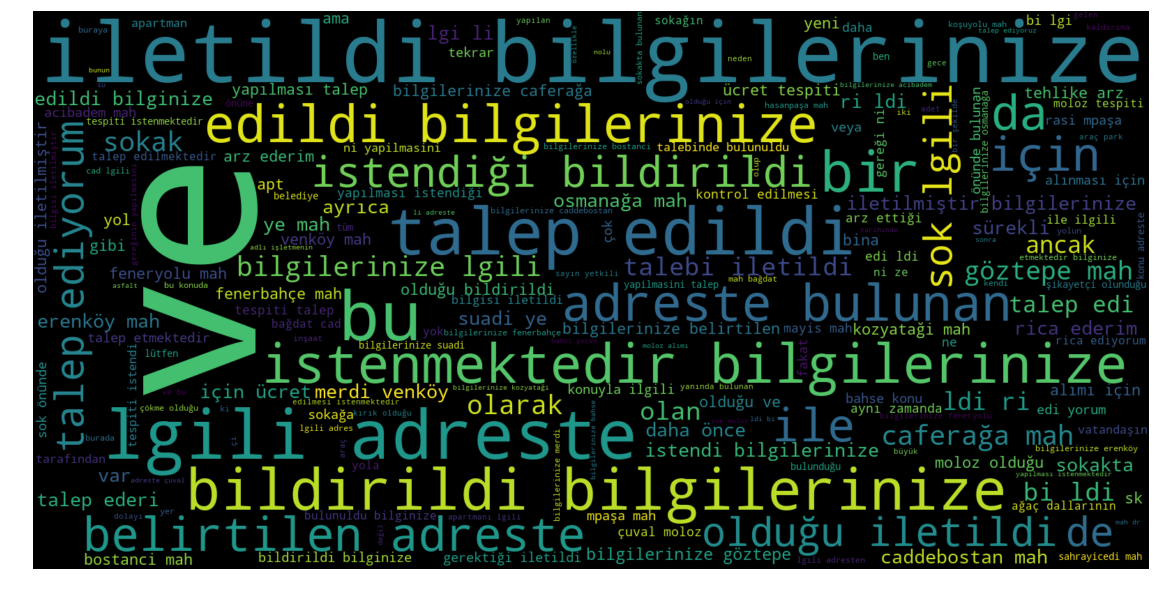

In [0]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from wordcloud import WordCloud
text = []
for i in df["Doküman Metin"]:
   text.append(i)#here we are adding word to text array but it's looking like this ['Larency','Homicide','Robbery']
text = ' '.join(map(str, text)) #Now we make all of them like this [LarencyHomicideRobbery]
wordcloud = WordCloud(width=1600, height=800, max_font_size=300,background_color='black').generate(text)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Kelime Sayısı

In [0]:
df['kelime_sayisi'] = df['Doküman Metin'].apply(lambda x: len(str(x).split(" ")))
df[['Doküman Metin','kelime_sayisi']].head()

,Doküman Metin,kelime_sayisi
0,i̇lgili adrese ikramlık talebinde bulunulmuştu...,5
2,i̇lgili adrese ikramlık talep edilmiştir.bilgi...,6
4,i̇lgili adres için ikramlık talep edildi.bilgi...,6
6,fikirtepe mah.kader sok. no : 29/3 ikramlık ta...,9
8,05353074596 telefonun numarasının sms sistemin...,9


Kapsam:
 count       13712
unique          5
top       Şikayet
freq        10033
Name: Kapsam, dtype: object


Text(0.5, 0, 'Kelime Sayısı')

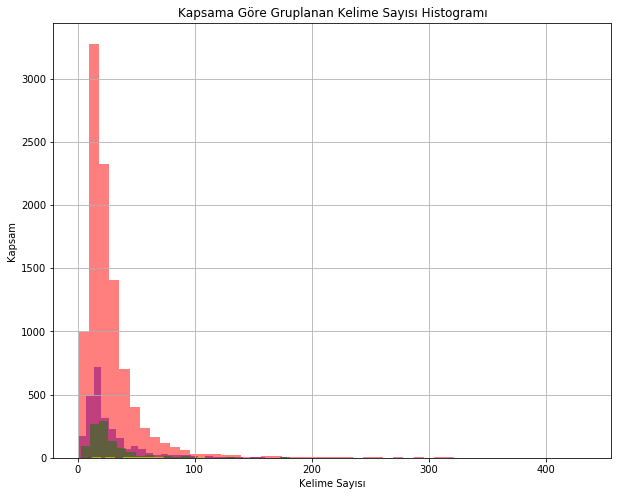

In [0]:
print("Kapsam:\n",df["Kapsam"].describe())

fig, ax = plt.subplots(1, 1,figsize=(10, 8))
df[ df.Kapsam == "Talep"]["kelime_sayisi"].hist(bins=50, color="blue", alpha=0.5, ax=ax)
df[df.Kapsam=="Şikayet"]["kelime_sayisi"].hist(bins=50, color="red", alpha=0.5, ax=ax)
df[df.Kapsam=="İhbar"]["kelime_sayisi"].hist(bins=50, color="green", alpha=0.5, ax=ax)
df[df.Kapsam=="Öneri"]["kelime_sayisi"].hist(bins=50, color="yellow", alpha=0.5, ax=ax)
df[df.Kapsam=="Teşekkür"]["kelime_sayisi"].hist(bins=50, color="brown", alpha=0.7, ax=ax)
plt.title('Kapsama Göre Gruplanan Kelime Sayısı Histogramı')
plt.ylabel('Kapsam')
plt.xlabel('Kelime Sayısı')


### Karakter Sayısı

Metin uzunluklarından karakter sayısı çıkarılmıştır. Boşluk karakterleri de sayılmıştır.

In [0]:
df['karakter_sayisi'] = df['Doküman Metin'].str.len() ## this also includes spaces
df[['Doküman Metin','karakter_sayisi']].head()

,Doküman Metin,karakter_sayisi
0,i̇lgili adrese ikramlık talebinde bulunulmuştu...,62
2,i̇lgili adrese ikramlık talep edilmiştir.bilgi...,56
4,i̇lgili adres için ikramlık talep edildi.bilgi...,51
6,fikirtepe mah.kader sok. no : 29/3 ikramlık ta...,67
8,05353074596 telefonun numarasının sms sistemin...,98


Text(0.5, 0, 'Karakter Sayısı')

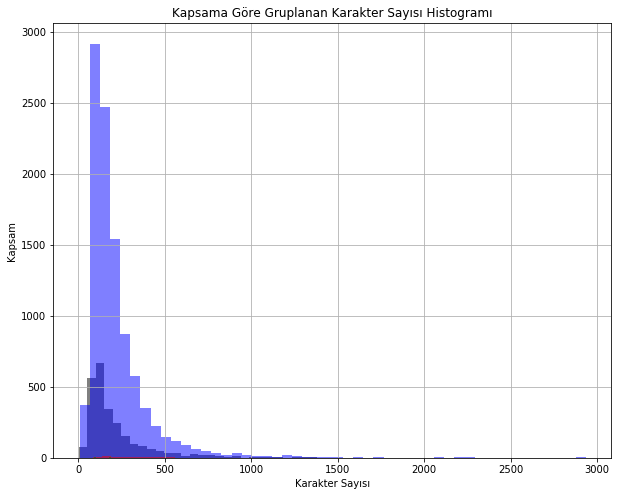

In [0]:
fg, ax = plt.subplots(1, 1,figsize=(10, 8))
df[df.Kapsam=="Talep"]["karakter_sayisi"].hist(bins=50, color="black",alpha=0.5,ax=ax)
df[df.Kapsam=="Şikayet"]["karakter_sayisi"].hist(bins=50, color="blue",alpha=0.5,ax=ax)
df[df.Kapsam=="Öneri"]["karakter_sayisi"].hist(bins=50, color="red",alpha=0.5,ax=ax)
df[df.Kapsam=="Teşekkür"]["karakter_sayisi"].hist(bins=50, color="green",alpha=0.5,ax=ax)
plt.title('Kapsama Göre Gruplanan Karakter Sayısı Histogramı')
plt.ylabel('Kapsam')
plt.xlabel('Karakter Sayısı')


### Ortalama Kelime Uzunluğu

Kullanılan kelimelerinin uzunluklarının kapsama göre farklılık gösterebileceği düşünülerek her metnin ortalam kelime uzunluğu bulunmuştur.

In [0]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['ort_kelime'] = df['Doküman Metin'].apply(lambda x: avg_word(x))
df[['Doküman Metin','ort_kelime']].head()

,Doküman Metin,ort_kelime
0,i̇lgili adrese ikramlık talebinde bulunulmuştu...,11.600000
2,i̇lgili adrese ikramlık talep edilmiştir.bilgi...,10.200000
4,i̇lgili adres için ikramlık talep edildi.bilgi...,7.666667
6,fikirtepe mah.kader sok. no : 29/3 ikramlık ta...,6.555556
8,05353074596 telefonun numarasının sms sistemin...,10.000000


Text(0.5, 0, 'Ortalama Kelime Sayısı')

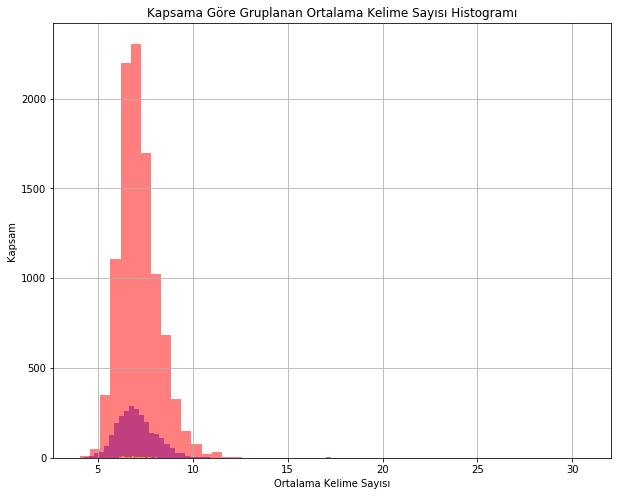

In [0]:
fg, ax = plt.subplots(1, 1,figsize=(10, 8))
df[df.Kapsam=="Talep"]['ort_kelime'].hist(bins=50, color="blue",alpha=0.5,ax=ax)
df[df.Kapsam=="Şikayet"]['ort_kelime'].hist(bins=50, color="red",alpha=0.5,ax=ax)
df[df.Kapsam=="Öneri"]['ort_kelime'].hist(bins=50, color="yellow",alpha=0.5,ax=ax)
df[df.Kapsam=="Teşekkür"]['ort_kelime'].hist(bins=50, color="brown",alpha=0.5,ax=ax)
plt.title('Kapsama Göre Gruplanan Ortalama Kelime Sayısı Histogramı')
plt.ylabel('Kapsam')
plt.xlabel('Ortalama Kelime Sayısı')


### Dolgu Sözcüğü Sayısı

Dil işleme problemini çalışmaya başlamadan önce şikayet/talep metnindeki dolgu sözcüklerini atacağız. Bu kelimeler genelde içerik hakkında bilgilendirici olmayan bağlaçlar, hitaplar, vs.'dir. Yine de bilgi kaybetmemek için dolgu sözcükleri sayısını ayrı bir kolonda tutmayı uygun gördük. Önce *nltk* kütüphanesinin dolgu sözcüklerini indirelim:

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stop = []
stop = stopwords.words('turkish')
stop.extend(["bilginize", "bilgilerinize", ".bilginize", 
             ".bilgilerinize", "bilginize.", "bilgilerinize.", 
             ".bilginize.", ".bilgilerinize.", "saygılarımla", "saygılarımla."
             ".saygılarımla", ".saygılarımla."])

df['dolgu_sayisi'] = df['Doküman Metin'].apply(lambda x:len([x for x in x.split()if x in stop]))
df[['Doküman Metin','dolgu_sayisi']].head()


,Doküman Metin,dolgu_sayisi
0,i̇lgili adrese ikramlık talebinde bulunulmuştu...,0
2,i̇lgili adrese ikramlık talep edilmiştir.bilgi...,0
4,i̇lgili adres için ikramlık talep edildi.bilgi...,1
6,fikirtepe mah.kader sok. no : 29/3 ikramlık ta...,0
8,05353074596 telefonun numarasının sms sistemin...,1


Text(0.5, 0, 'Dolgu Kelime  Sayısı')

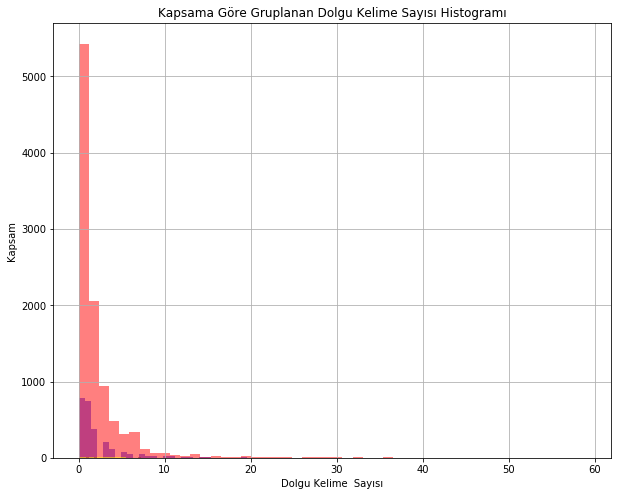

In [0]:
fg, ax = plt.subplots(1, 1,figsize=(10, 8))
df[df.Kapsam=="Talep"]['dolgu_sayisi'].hist(bins=50, color="blue",alpha=0.5,ax=ax)
df[df.Kapsam=="Şikayet"]['dolgu_sayisi'].hist(bins=50, color="red",alpha=0.5,ax=ax)
df[df.Kapsam=="Öneri"]['dolgu_sayisi'].hist(bins=50, color="yellow",alpha=0.5,ax=ax)
df[df.Kapsam=="Teşekkür"]['dolgu_sayisi'].hist(bins=50, color="brown",alpha=0.5,ax=ax)
plt.title('Kapsama Göre Gruplanan Dolgu Kelime Sayısı Histogramı')
plt.ylabel('Kapsam')
plt.xlabel('Dolgu Kelime  Sayısı')


In [0]:
print(stop)
df.dolgu_sayisi.describe()

['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani', 'bilginize', 'bilgilerinize', '.bilginize', '.bilgilerinize', 'bilginize.', 'bilgilerinize.', '.bilginize.', '.bilgilerinize.', 'saygılarımla', 'saygılarımla..saygılarımla', '.saygılarımla.']


count    13712.000000
mean         2.271222
std          3.534201
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         59.000000
Name: dolgu_sayisi, dtype: float64

### Rakam Sayısı

Metinlerde geçen rakam sayısı da bir kolonda tutulmuştur.

In [0]:
df['rakam_sayisi'] = df['Doküman Metin'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Doküman Metin', 'rakam_sayisi']].head()
df["rakam_sayisi"].unique()

array([ 0,  1,  3,  4,  2,  8,  5,  9,  6, 12, 10,  7, 15, 13, 19, 18, 28])

Text(0.5, 0, 'Rakam İçeren Kelime Sayısı')

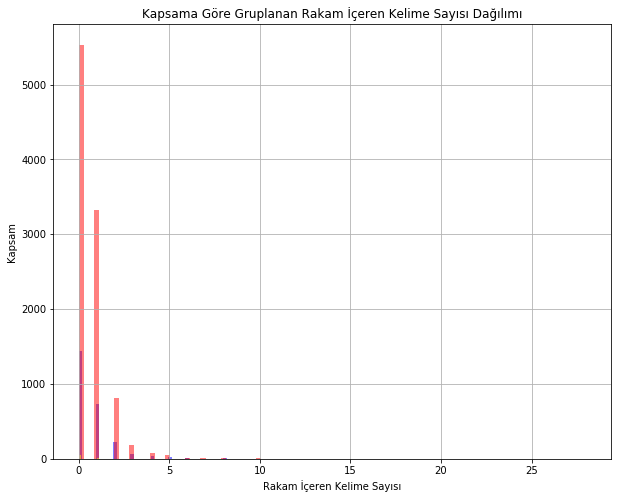

In [0]:
fg, ax = plt.subplots(1, 1,figsize=(10, 8))
df[df.Kapsam=="Talep"]['rakam_sayisi'].hist(bins=100, color="blue",alpha=0.5,ax=ax)
df[df.Kapsam=="Şikayet"]['rakam_sayisi'].hist(bins=100, color="red",alpha=0.5,ax=ax)
df[df.Kapsam=="Öneri"]['rakam_sayisi'].hist(bins=100, color="yellow",alpha=0.5,ax=ax)
df[df.Kapsam=="Teşekkür"]['rakam_sayisi'].hist(bins=100, color="brown",alpha=0.5,ax=ax)
plt.title('Kapsama Göre Gruplanan Rakam İçeren Kelime Sayısı Dağılımı')
plt.ylabel('Kapsam')
plt.xlabel('Rakam İçeren Kelime Sayısı')

## Ön-işleme'ye Devam

### Noktalama İşaretlerini Kaldırma

Noktalama işaretleri içerik açısından bilgilendirici  değildir. Önce kaldırılmaları düşünülmüştür ama bazı yazım hatalarından dolayı kelimelerin birbirlerine ulanmalarına neden olduklarından, " " (boşluk) karakteri ile değiştirilip sonradan düşürülmüşlerdir.

In [0]:
df['Doküman Metin'] = df['Doküman Metin'].str.replace('.',' ')

In [0]:
df['Doküman Metin'] = df['Doküman Metin'].str.replace(',',' ')

In [0]:
df['Doküman Metin'] = df['Doküman Metin'].str.replace('[^\w\s]','')
df['Doküman Metin'].head()

0    ilgili adrese ikramlık talebinde bulunulmuştur...
2    ilgili adrese ikramlık talep edilmiştir bilgil...
4    ilgili adres için ikramlık talep edildi bilgin...
6    fikirtepe mah kader sok  no  293 ikramlık tale...
8    05353074596 telefonun numarasının sms sistemin...
Name: Doküman Metin, dtype: object

### Rakamları Silme

Adres bilgileri ile gelen sayıların içerik hakkında bilgilendirici olmadığını düşündüğümüz için kaldırıyoruz.

In [0]:
#df = df.copy()
df['Doküman Metin'] = df['Doküman Metin'].str.replace('\d+', '')
df['Doküman Metin'].head()

0    ilgili adrese ikramlık talebinde bulunulmuştur...
2    ilgili adrese ikramlık talep edilmiştir bilgil...
4    ilgili adres için ikramlık talep edildi bilgin...
6    fikirtepe mah kader sok  no   ikramlık talep e...
8     telefonun numarasının sms sisteminden çıkartı...
Name: Doküman Metin, dtype: object

### Dolgu Sözcüklerinden Kurtulma



In [0]:
df['Doküman Metin'] = df['Doküman Metin'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Doküman Metin'].head()

0       ilgili adrese ikramlık talebinde bulunulmuştur
2              ilgili adrese ikramlık talep edilmiştir
4                   ilgili adres ikramlık talep edildi
6     fikirtepe mah kader sok no ikramlık talep edildi
8    telefonun numarasının sms sisteminden çıkartıl...
Name: Doküman Metin, dtype: object

### Sık Tekrarlar

Sık tekrar eden kelimeler bilgilendirici olmayacaktır. Tüm girdilerde, en sık tekrar eden 15 kelimeyi listeleyelim. "talep" dışındaki kelimeler, içeriğin kapsamı hakkında bilgilendirici değildir.

In [0]:
freq = pd.Series(' '.join(df['Doküman Metin']).split()).value_counts()[:30]
freq = freq[freq>1000]
print(freq)


mah              6117
no               5640
sok              4367
olduğu           4301
talep            4074
ilgili           3604
bir              3483
iletildi         3232
adreste          3164
bulunan          3088
bildirildi       1858
edildi           1801
cad              1676
sokak            1656
olarak           1545
ederim           1306
önünde           1199
iletilmiştir     1191
istenmektedir    1167
yapılması        1133
ediyorum         1085
park             1085
dtype: int64


In [0]:
freq.pop("talep")
freq

mah              6117
no               5640
sok              4367
olduğu           4301
ilgili           3604
bir              3483
iletildi         3232
adreste          3164
bulunan          3088
bildirildi       1858
edildi           1801
cad              1676
sokak            1656
olarak           1545
ederim           1306
önünde           1199
iletilmiştir     1191
istenmektedir    1167
yapılması        1133
ediyorum         1085
park             1085
dtype: int64

In [0]:
freq = list(freq.index)
df['Doküman Metin'] = df['Doküman Metin'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Doküman Metin'].head()

0              adrese ikramlık talebinde bulunulmuştur
2                     adrese ikramlık talep edilmiştir
4                                 adres ikramlık talep
6                       fikirtepe kader ikramlık talep
8    telefonun numarasının sms sisteminden çıkartıl...
Name: Doküman Metin, dtype: object

### Nadir Kelimeler

Nadir görülen kelimelerin diğerleri ile olan ilişkisi zaten verideki gürültü tarafından baskılanacağı için az tekrarlanan kelimeler de bizim için bilgilendirici olmayacaktır, onları da atalım. Eşik değer olarak frekansı 5 seçtik. 5'ten az görünen kelimeleri listelediğimizde yanlış yazılan kelimelerin, birbirine ulanan kelimeler olduğunu gördük.

In [0]:
freq2 = pd.Series(' '.join(df['Doküman Metin']).split()).value_counts()#[-100:]
freq2 = freq2[freq2<5.1]


In [0]:
freq2

uygundur            5
istasyonun          5
irem                5
yenimütevelli       5
yonca               5
kuruçay             5
kirliliğinin        5
görüyoruz           5
binalarla           5
profesyonel         5
tlye                5
yildiray            5
vinçle              5
gösterdikleri       5
sakıncalı           5
anitlar             5
edilmişti           5
blokun              5
belirten            5
alindiği            5
yıkaması            5
sağlayacaktır       5
açmıştır            5
ekibe               5
telle               5
nedenini            5
sisteminde          5
isteğimiz           5
atılmakta           5
sonucun             5
                   ..
artıracağını        1
sayfasındaki        1
sabrettiğimizi      1
aşevinde            1
artıyor             1
kaçkez              1
alkollerinin        1
çalışanlardan       1
begonya             1
çekemedikleri       1
standardına         1
komutanlığı         1
bedava              1
olmadığımız         1
kaçabilme 

In [0]:
freq2 = list(freq2.index)
#df2 = df.copy()
df['Doküman Metin'] = df['Doküman Metin'].apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
df['Doküman Metin'].head()

0              adrese ikramlık talebinde bulunulmuştur
2                     adrese ikramlık talep edilmiştir
4                                 adres ikramlık talep
6                             fikirtepe ikramlık talep
8    telefonun numarasının sms sisteminden çıkartıl...
Name: Doküman Metin, dtype: object

In [0]:
df['Doküman Metin'].describe()

count           13712
unique          12475
top       çuval moloz
freq               30
Name: Doküman Metin, dtype: object

## Kelime Köklerini Bulma

NLTK kütüphanesinin Snowball stemmer modülü Türkçe dilini desteklememektedir. Ancak ayrı olarak indirilebilir (Aşağıdaki hücrenin başındaki # işareri kaldırılarak çalıştırılmalı).

In [0]:
!pip install snowballstemmer

In [0]:
from snowballstemmer import TurkishStemmer
turkStem=TurkishStemmer()
#turkStem.stemWord(df["Doküman Metin"])

df['Doküman Metin'].apply(lambda x: " ".join(turkStem.stemWord(x) for x in x.split()))

0                             adres ikramlık talep bulunul
2                                adres ikramlık talep edil
4                                     adres ikramlık talep
6                                  fikirtep ikramlık talep
8               telefo numara sms sistem çıkartılmas talep
9                 belirtile adres e ikramlik talep bulunul
11                      belirtile adres ikra talep bulunul
12         numara sahip vatandaş sms sistem çıkmak istedik
13       iletiş numara bilgilendirme iptal edilmes tale...
15       mayis güneşli kat vefat e şükrü şer tepsi ikra...
17               kozyataği kocayol b blok d ikramlik talep
18                       rasimpaş recaiza d ikramlık talep
20                                         sms iptal talep
21                              sms gelmemes talep bulunul
22                                            mesaj atılma
23                                        mesaj gönderilme
24       suadi em alipaş kat vefat e bugu akşa ikramlık.

## TF-IDF Ağırlıklı Vektörize Etme Ve Modelleri Deneme

5-fold cv. En iyi performans skorları RF ile elde edildi.


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1))
vectorizer.fit(df['Doküman Metin'])

y = df['Kapsam']
X = vectorizer.transform(df['Doküman Metin'])

### Lojistik Regresyon

5-fold acc  . [0.75437318 0.70663265 0.70897155 0.79058738 0.75264502]
Accuracy: 0.74 (+/- 0.06)
f1 Score: 0.24 (+/- 0.05)

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


scoring = ['f1_macro', 'accuracy']
classifier = LogisticRegression(random_state=42)

scores = cross_validate(classifier, X, y, scoring=scoring, cv=5)
                        
print(sorted(scores.keys()))

print("5-fold acc  .", scores['test_accuracy'])

print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("f1 Score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro']
5-fold acc  . [0.75437318 0.70663265 0.70897155 0.79058738 0.75264502]
Accuracy: 0.74 (+/- 0.06)
f1 Score: 0.24 (+/- 0.05)


### SVM (linear kernel)
5-fold acc  . [0.75182216 0.64723032 0.71480671 0.78803356 0.76541408]
Accuracy: 0.73 (+/- 0.10)
f1 Score: 0.33 (+/- 0.06)

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import svm


scoring = ['f1_macro', 'accuracy']
classifier = svm.SVC(kernel = 'linear',random_state=42)


scores = cross_validate(classifier, X, y, scoring=scoring, cv=5)
                        
print(sorted(scores.keys()))

print("5-fold acc  .", scores['test_accuracy'])

print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("f1 Score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro']
5-fold acc  . [0.75182216 0.64723032 0.71480671 0.78803356 0.76541408]
Accuracy: 0.73 (+/- 0.10)
f1 Score: 0.33 (+/- 0.06)


### Random Forest 

5-fold acc  . [0.77040816 0.70262391 0.71735959 0.80809923 0.78657424]
Accuracy: 0.76 (+/- 0.08)
f1 Score: 0.48 (+/- 0.10)

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier(n_estimators=100,random_state=42)

scoring = ['f1_macro', 'accuracy']


scores = cross_validate(classifier, X, y, scoring=scoring, cv=5)
                        
print(sorted(scores.keys()))

print("5-fold acc  .", scores['test_accuracy'])

print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("f1 Score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro']
5-fold acc  . [0.77040816 0.70262391 0.71735959 0.80809923 0.78657424]
Accuracy: 0.76 (+/- 0.08)
f1 Score: 0.48 (+/- 0.10)


## N-gram Seçimi

### Bi-gram

Unigramlar yerine bigrama göre vektörize edildiğinde, vektör uzunluğu arttığından modele sokulan öznitelik sayısı artmıştır. Bu da modelin eğitim süresinin çok uzamasına neden olmuştur. Ayrıca model daha düşük performans gösterdiği için unigram modeli ile devam etmeye karar verdik.

5-fold acc  . [0.68440233 0.70918367 0.66119621 0.73549799 0.7019336 ]
Accuracy: 0.70 (+/- 0.05)
f1 Score: 0.40 (+/- 0.07)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))
vectorizer.fit(df['Doküman Metin'])

y = df['Kapsam']
X = vectorizer.transform(df['Doküman Metin'])

classifier = RandomForestClassifier(n_estimators=100,random_state=42)

scoring = ['f1_macro', 'accuracy']


scores = cross_validate(classifier, X, y, scoring=scoring, cv=5)
                        
print(sorted(scores.keys()))

print("5-fold acc  .", scores['test_accuracy'])

print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("f1 Score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro']
5-fold acc  . [0.68440233 0.70918367 0.66119621 0.73549799 0.7019336 ]
Accuracy: 0.70 (+/- 0.05)
f1 Score: 0.40 (+/- 0.07)


## Eğitim - Test Kumesi Ayrımı

kapsamdaki sınıflara gore katmanlı 80/20 oraNINda ayrım yapıldı

In [0]:
from sklearn.model_selection import train_test_split
y = df["Kapsam"]
sentences = df["Doküman Metin"]
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, stratify = y, random_state=42)
print(sentences_train.shape)
print(sentences_test.shape)

(10969,)
(2743,)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vectorizer.fit(sentences_train)


X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

In [0]:
X_train.shape

(10969, 6847)

## Hiper-parametre Kestirimi

1. Best parameters {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42, 'verbose': 2}
 

---

F1 Score:  0.2544484246352658
Test Accuracy: 0.7743346700692673
************************

## **Hiper-parametre optimal**
2. Best parameters {'bootstrap': False, 'max_depth': [20, 30, 40, 50],
   'max_features': ['auto' ],
   'min_samples_leaf': [ 4, 6, 8],
   'min_samples_split': [10, 16, 24],
   'n_estimators': [100],
   'random_state': [50],
   'verbose': [2],
   'n_jobs': [-1]


---

F1 Score:  0.2692892811136687 Test Accuracy: 0.7830842143638352




In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
   'bootstrap': [False],
   'max_depth': [20, 30, 40, 50],
   'max_features': ['auto' ],
   'min_samples_leaf': [ 4, 6, 8],
   'min_samples_split': [10, 16, 24],
   'n_estimators': [100],
   'random_state': [50],
   'verbose': [2],
   'n_jobs': [-1]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                         cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print("Best parameters", grid_search.best_params_)
best_model = grid_search.best_estimator_
print(best_model)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.4s


building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished


In [0]:
from sklearn import metrics

y_pred = best_model.predict(X_test)

  
  
print("************************")
print("F1 Score: ",f1_score(y_test,y_pred, average='macro' ))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("************************")

************************
F1 Score:  0.2692892811136687
Test Accuracy: 0.7830842143638352
************************


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn import metrics

y_pred = best_model.predict(X_train)

  
  
print("************************")
print("F1 Score: ",f1_score(y_train,y_pred, average='macro' ))
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred))

print("************************")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


************************
F1 Score:  0.2815500959472641
Train Accuracy: 0.7935089798523111
************************


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## **Hiper-parametre optimal training set üzerinde**
2. Best parameters {'bootstrap': False, 'max_depth': [20, 30, 40, 50],
   'max_features': ['auto' ],
   'min_samples_leaf': [ 4, 6, 8],
   'min_samples_split': [10, 16, 24],
   'n_estimators': [100],
   'random_state': [50],
   'verbose': [2],
   'n_jobs': [-1]


---

F1 Score:  0.2815500959472641
Test Accuracy: 0.7935089798523111


Y-train ile Y-test arasındaki accuracy farkı 0.01042476548
Y-train ile Y-test arasındaki F1 Score farkı 0.01226081483

## Kaynaklar

1.   [Ultimate guide to deal with Text Data (using Python) – for Data Scientists and Engineers](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/)
2.   [Python’da SnowBall Stemmer Kullanılması](https://medium.com/@aanilkayy/pythonda-snowball-stemmer-kullanılması-e91ed9be8e9e)
3.[Document Classification Part 2: Text Processing (N-Gram Model & TF-IDF Model)](https://medium.com/machine-learning-intuition/document-classification-part-2-text-processing-eaa26d16c719)
4. [Document Classification Part 3: Detection Algorithm (Support Vector Machines & Gradient Descent)](https://medium.com/machine-learning-intuition/document-classification-part-3-detection-algorithm-support-vector-machines-gradient-descent-282316b0838e)
5.[Practical Text Classification With Python and Keras](https://realpython.com/python-keras-text-classification/)
6. [Natural Language Processing: Text Data Vectorization](https://medium.com/@paritosh_30025/natural-language-processing-text-data-vectorization-af2520529cf7)
7. [TÜRKÇE METİN İŞLEMEDE İLK ADIMLAR](http://www.veridefteri.com/2017/11/20/turkce-metin-islemede-ilk-adimlar/)

